## Simple Linear Regression

In this very simple example we wll create a very simple fit line, the classic case of `y=mx+b` where:

- x represents the independent variable
- y represents the dependent variable
- m represents the slope of the line, which indicates the relationship between x and y
- b represents the y-intercept, which is the value of y when x is zero

Linear regression is a method for predicting y from x. In our case, y is the dependent variable, and x is the independent variable. We want to predict the value of y for a given value of x. Now, if the data were perfectly linear, we could simply calculate the slope intercept form of the line in terms y = mx+ b. To predict y, we would just plug in the given values of x and b. In the real world, our data will not be perfectly linear. It will likely be in the form of a cluster of data points on a scatterplot. From that scatterplot, we would like to determine, what is the line of best fit that describes the linear qualities of the data, and how well does the line fit the cluster of points?

## Section 1: By Hand Implementation

First we will implement the solution using formulas and in section 2 we will do it using library methods

Our main data is only `advertisement` and `sales` columns, the rest of data is based on the main 2 columns. We are also displaying the rest of the data to easily notice in the formulas where the numbers are coming from.

advertisement (x) | sales (y) | xy | $x^{2}$ | $y^{2}$
--- | --- | --- | ---| ---
337 | 22 | 7414 | 113569 | 484
129 | 10 | 1290 | 16641 | 100
132 | 9 | 1188 | 17424 | 81
251 | 19 | 4769 | 63001 | 361
250 | 13 | 3250 | 62500 | 169
133 | 7 | 931 | 17689 | 49
114 | 12 | 1368 | 12996 | 144
151 | 13 | 1963 | 22801 | 169
12 | 5 | 60 | 144 | 25
224 | 11 | 2464 | 50176 | 121

$$\sum$$
advertisement (x) | sales (y) | xy | $x^{2}$ | $y^{2}$
--- | --- | --- | --- | ---
1733 | 121 | 24697 | 376941 | 1703

First find the value of `m`

$$m = \frac{n(\sum{xy})-(\sum{x})(\sum{y})}{n(\sum{x^{2}})-(\sum{x})^{2}}$$

Second find the value of `b`

$$b = \frac{\sum{y}-m(\sum{x})}{n}$$

Now we can finally find the value of `y`

$$y = mx + b$$

---

$$m = \frac{10(24697)-(1733)(121)}{10(376941)-(1733)^{2}}$$

$$m = 0.0486568$$

$$b = \frac{121-0.0486568(1733)}{10}$$

$$b = 3.66777572$$

$$y = 0.0486568 * x + 3.66777572$$

Now if we want to predict how much sales we will make if we spend 200 money on advertisement the result would look like below:

$$y = 0.0486568 * 200 + 3.66777572$$
$$y = 13.39913572$$

Now we can create 11th row where we predict, that if we spend 200 money on adverstisement we will sell 13 pieces of goods.

advertisement (x) | sales (y)
--- | --- 
337 | 22 
129 | 10 
132 | 9 
251 | 19 
250 | 13 
133 | 7 
114 | 12 
151 | 13 
12 | 5 
224 | 11 
**200** | **13**

## Section 2: Implementation using libraries

After we saw how we got our results, let's now do it the easier way using built-in methods and plots to get the same result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The `advertisement` column shows how much money we spend on advertisement and in the `sales` column we can see what profit we make.

In [2]:
# Indedependent variable
x = np.array([337, 129, 132, 251, 250, 133, 114, 151, 12, 224])
# Dependent variable
y = np.array([22, 10, 9, 19, 13, 7, 12, 13, 5, 11])

df = pd.DataFrame({'advertisement': x, 'sales': y})

We can see, that there is a relationship between the spending we make on advertisement and the sales we make. The more advertisement, the more sales.

<Axes: xlabel='advertisement', ylabel='sales'>

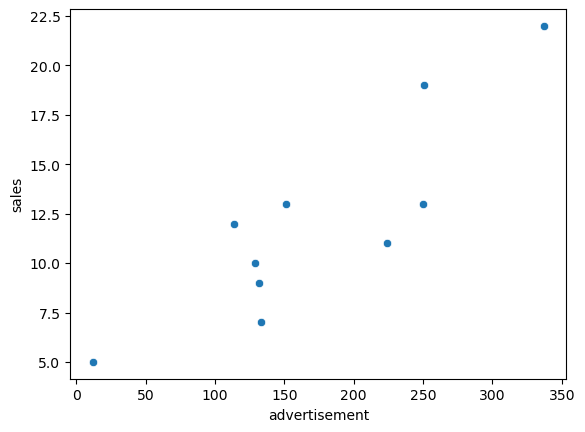

In [3]:
sns.scatterplot(data=df, x='advertisement', y='sales')

### Least Squares Line

Least Squares Line is used to predict y values for given x values.

The least squares line is defined as the line where the sum of the squares of the vertical distances from the data points to the line is as small as possible.

Our next ad campaign will have a total spend of 200, how many units do we expect to sell as a result of this?

<Axes: xlabel='advertisement', ylabel='sales'>

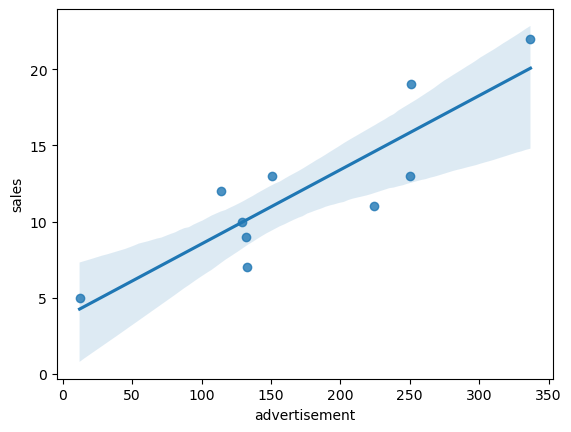

In [4]:
# Basically, we want to figure out how to create this line
sns.regplot(data=df, x='advertisement', y='sales')

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels `sales` numbers (Y) and a known matrix of `advertisement` (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use y hat to indicate that y hat is a prediction or estimation, y would be a true label/known value.

In [5]:
x = df['advertisement']
y = df['sales']

In [6]:
polyfit_data = np.polyfit(x, y, 1)
polyfit_data

array([0.0486568 , 3.66777572])

In [7]:
potential_spend = np.linspace(0, 400, 100)
predicted_sales = 0.0486568 * potential_spend + 3.66777572

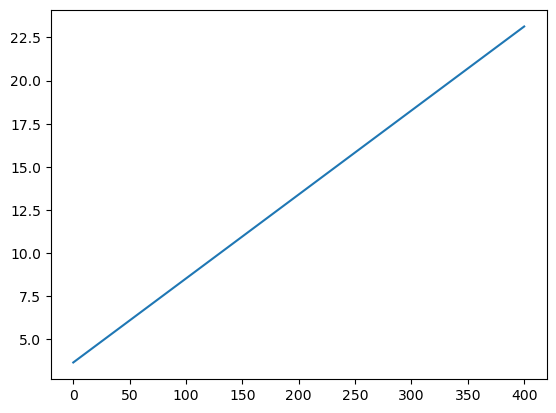

In [8]:
plt.plot(potential_spend, predicted_sales)

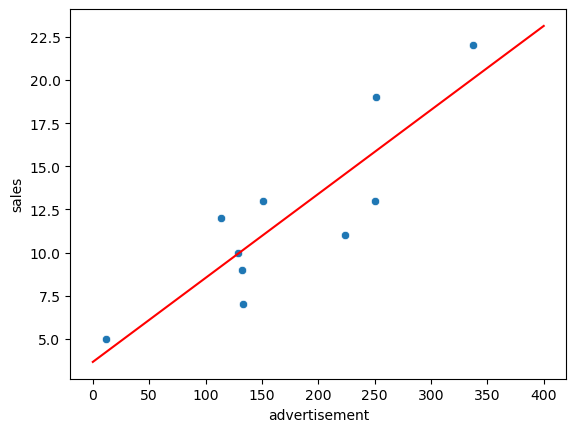

In [9]:
sns.scatterplot(data=df, x='advertisement', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')

In [10]:
spend = 200
predicted_sales =  0.0486568 * spend + 3.66777572
predicted_sales

13.39913572

## Section 3: Overfitting, Underfitting and Measuring Performance

Until now we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [11]:
np.polyfit(x, y, 3)

array([ 6.70722769e-07, -2.66381140e-04,  6.66095132e-02,  4.38158204e+00])

In [12]:
new_potential_spend = np.linspace(0, 400, 100)

In [13]:
a = 6.70722769e-07 * new_potential_spend ** 3
b = -2.66381140e-04 * new_potential_spend ** 2
c = 6.66095132e-02 * new_potential_spend ** 1
d = 4.38158204e+00

new_predicted_sales = a + b + c + d

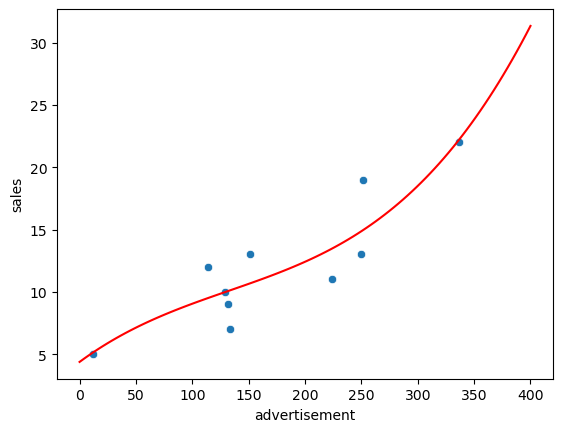

In [14]:
sns.scatterplot(data=df, x='advertisement', y='sales')
plt.plot(new_potential_spend, new_predicted_sales, color='red')

Is this better than our straight line fit? What are good ways of measuring this?

**Continue learning with next notebook `linear-regression-scikit.ipynb` where things get more advanced than this.**